<a href="https://colab.research.google.com/github/Davilirio/Python_data_analysis/blob/master/AB_NYC_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando as dependencias

In [1]:
from fastai.imports import *
from google.colab import drive, files
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set(style="darkgrid")
plt.style.use('seaborn-dark')

drive.mount('/content/my_drive/')
path = Path('/content/my_drive/My Drive/preprocessing')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/my_drive/


### **Questão 1​ .** ​ Importando o dataset ​ AB_NYC_2019.csv ​ para um SGBD a sua escolha (MySQL, PostgreSQL, Redshift)​,​ crie uma consulta SQL​ para cada item listado a seguir.

#### **a)** Lista de hosts distintos (coluna ​ name​ ), agrupados pela coluna ​ room_type. (0,5 ponto)


```
SELECT host_name
FROM airbnb.nyc
GROUP BY room_type;
```
#### **b)** Total de reviews e média de reviews por mês para ​ hosts localizados no Brooklyn (​neighbourhood_group​ ). ​ (1 ponto)


```
SELECT AVG(number_of_reviews),SUM(number_of_reviews)
FROM airbnb.nyc
WHERE neighbourhood_group = 'Brooklyn';
```

#### **c)** Trazer a quantidade de dias disponíveis, valores mínimo, máximo e média da coluna price ​ para cada host que contenha a palavra ​ room na coluna ​ name e estiveram disponíveis ao menos um dia para locação (considere availability_365 como o número de dias disponíveis para locação). O resultado deve estar agrupado por quantidade de dias disponíveis. ​ (1,5 pontos)



```
SELECT availability_365, MAX(price), AVG(price)
FROM airbnb.nyc
WHERE name CONTAINS 'room'
AND availability_365 >= 1
GROUP BY host_name
```





###**Questão 2**: ​ Crie um script em ​ Python​ ou ​ Node.js ​ que carrega os dados do dataset e, como saída, crie um arquivo CSV somente as seguintes colunas do dataset original:
###**id​** , ​ **host_id**​ , ​ **price**​ , ​ **number_of_reviews​** , ​ **last_review​** (0,5 ponto).

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# lendo o arquivo:
df = pd.read_csv(path/'AB_NYC_2019.csv')
# lista de colunas desejadas:
desired_cols = ['id', 'host_id','price','number_of_reviews','last_review']
# filtrando por coluna:
df_filtered = df[desired_cols]
# visualizacao do df criado:
df_filtered.head()

,id,host_id,price,number_of_reviews,last_review
0,2539,2787,149,9,2018-10-19
1,2595,2845,225,45,2019-05-21
2,3647,4632,150,0,NaN
3,3831,4869,89,270,2019-07-05
4,5022,7192,80,9,2018-11-19


In [ ]:
# criando o arquivo em formato CSV
df_filtered.to_csv(path/'AB_NYC_2019_filtered.csv',
                   columns=df_filtered.columns.values)

#### Checagem do resultado:

In [ ]:
# como o csv nao possui metadata de index, torna-se necessario avisar 
# qual coluna se comporta como index do df:
result_check=pd.read_csv(path/'AB_NYC_2019_filtered.csv', index_col='Unnamed: 0')
result_check.head()

,id,host_id,price,number_of_reviews,last_review
0,2539,2787,149,9,2018-10-19
1,2595,2845,225,45,2019-05-21
2,3647,4632,150,0,NaN
3,3831,4869,89,270,2019-07-05
4,5022,7192,80,9,2018-11-19


### **Questão 3**: ​ Visando analisar a variação do preço de locação dos hosts, descreva de forma clara e organizada, o tratamento de dados você utilizaria sobre o dataset em questão,englobando pré-processamento, análise textual, algoritmos de mineração de dados,ferramentas de data discovery ou qualquer outra forma/técnica que seja de seuconhecimento. Para esta questão será considerado o processo aplicado sobre o conjunt de dados, visando extrair informações relevantes sobre os dados que possam influenciar no preço de locação do host. ​ (2 pontos)

#### Em busca de procurar relações entre as variáveis disponibilizadas no dataset com o preço dos imóveis para locação, seria necessário procurar relações individuais entre as colunas que possuem possível impacto com a variável dependente (neste exemplo: preço). Há diversas metodologias possíveis para a obtenção destas relações, entre elas existem metodologias estatísticas de regressão linear, onde os Betas do modelo seguinte seriam os parametros de impacto de cada variavel no modelo. 

\begin{align} 
price = \beta_0 X_0 + \beta_1 X_1 + ...+ \beta_n X_n + residuos
\end{align}

#### Para que isto seja possivel, é de bom costume checar os impactos individuais advindos de cada variavel no preço do imóvel, buscando inicialmente via análise gráfica relações visíveis com a variável exógena. Neste caso, iniciamos com a limpeza do dataset, deixando apenas colunas de interesse, retirando ou preenchendo os valores que faltam dependendo se a variável é categórica ou contínua. No caso atual, retiramos a variável de nome do *listing* e nome do *host*, que se mostram desnecessárias ainda em análise superficial. Em seguida, tornamos para a seleção de apenas locais que possuem quantia significativa de dados, para que locais pouco representativos no dataset não viesem o modelo de forma não realista, para isto, selecionamos apenas os ***ids*** que mais aparecem entre os dados. 
#### Concluida tal etapa, buscamos agora relações entre os locais com o preço, sendo, com os resultados demonstrados abaixo, perceptível que há relação entre bairro e preço, o que é esperado em dados imobiliários. Na busca de maior entendimento do problema, plotamos as coordenadas espaciais dos 20 locais mais baratos, em comparação com os 20 locais mais caros. Seguimos para a checagem de se o número de reviews se comporta de forma correlata com os preços, o que não se mostra correlato em análise individual, portanto seguimos para a checagem agrupada com os bairros em busca da checagem da hipotese do número de reviews impactar os preços após a escolha do bairro, o que não se mostra realista também, dado que graficamente o valor se mostra estacionário em uma média. No entanto, tal variável ainda será utilizada na análise pois possui sentido racional.
#### Às variáveis categoricas, seria aplicado numericalização onde seria dado um valor inteiro representativo para cada variável categórica de forma que estes valores possam ser incluídos na regressão multivariada que será utilizada para buscar os impactos de cada parâmetro.
#### Tendo limpado, compreendido a natureza dos dados e o problema a ser resolvido, tornamos para a aplicação da regressão em busca de cada parâmetro (beta) do modelo, pois tais valores representarão os impactos advindos de tal variável no preço. Não tão simples é o processo, para evitar o problema de regressão espúria devemos testar alguns formatos de variáveis e analisar os testes de regressão, como o valor do p-estatístico, o teste-f e durbin-watson do modelo. Com todos os testes se comportando como o esperado, temos então os impactos individuais de cada variável no preço.

#### Segue abaixo exemplificação:

In [2]:
df = pd.read_csv(path/'AB_NYC_2019.csv')
df.drop(columns = ['name', 'host_name'], inplace = True)
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.fillna({'reviews_per_month':0}, inplace=True)

In [4]:
## 50 bairros que mais constam no df:
top_50 = (df.groupby('neighbourhood')['id'].count()
                                             .sort_values(ascending = False)[:50])

df_50 = df.loc[df['neighbourhood'].isin(top_50.index.values)]

print('10 bairros com maior numero de reviews: \n'), top_50[:10]

10 bairros com maior numero de reviews: 



(None, neighbourhood
 Williamsburg          3920
 Bedford-Stuyvesant    3714
 Harlem                2658
 Bushwick              2465
 Upper West Side       1971
 Hell's Kitchen        1958
 East Village          1853
 Upper East Side       1798
 Crown Heights         1564
 Midtown               1545
 Name: id, dtype: int64)

In [5]:
## Nota-se que ha diferenca significativa de precos entre os bairros:
bairros_mais_caros = df_50.groupby('neighbourhood')['price'].mean().sort_values(ascending = False)

print('Bairros mais caros: \n'),bairros_mais_caros[:10]

Bairros mais caros: 



(None, neighbourhood
 SoHo                  287.103352
 Midtown               282.719094
 West Village          267.682292
 Greenwich Village     263.405612
 Chelsea               249.738544
 Theater District      248.013889
 Nolita                230.138340
 Financial District    225.490591
 Gramercy              222.754438
 Murray Hill           220.958763
 Name: price, dtype: float64)

In [6]:
bairros_mais_baratos = df_50.groupby('neighbourhood')['price'].mean().sort_values()
print('Bairros mais baratos: \n'),bairros_mais_baratos[:10]

Bairros mais baratos: 



(None, neighbourhood
 Ridgewood             77.184397
 Elmhurst              80.459916
 Jackson Heights       80.897849
 East Elmhurst         81.183784
 Bushwick              84.800406
 Sunnyside             84.865014
 Woodside              85.097872
 East New York         85.426606
 Inwood                88.896825
 Washington Heights    89.610679
 Name: price, dtype: float64)

##### Nota-se que ha separacao entre os locais mais baratos dos mais caros, como esperado. Os locais com maior preco se concentram, enquanto os de menor sao mais distribuidos. Entende-se que os de maior preco se concentram no centro da cidade de nova iorque.

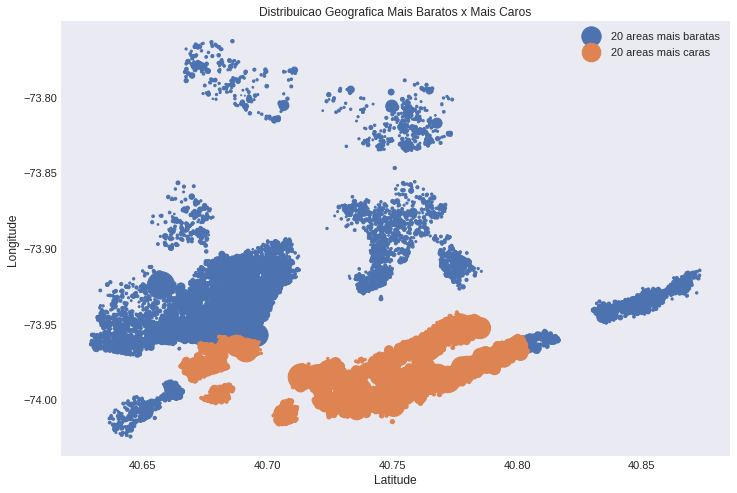

In [7]:
mais_caros = df_50.loc[df_50['neighbourhood'].isin(bairros_mais_caros.index[:20].values)]
mais_baratos = df_50.loc[df_50['neighbourhood'].isin(bairros_mais_baratos.index[:20].values)]
# distribuicao Geografica dos mais caros x mais baratos
fig, ax = plt.subplots(figsize = (12, 8))

ax.scatter(x=mais_baratos['latitude'], y = mais_baratos['longitude'],label = '20 areas mais baratas',
           s=mais_baratos['price']*0.1)
ax.scatter(x=mais_caros['latitude'], y = mais_caros['longitude'], label = '20 areas mais caras', s=mais_caros['price']*0.07 )

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('Distribuicao Geografica Mais Baratos x Mais Caros')
ax.legend()
fig.show()

##### Nota-se que o numero de reviews por si nao representa impacto significativo nos precos das estadias, há a relação negativa lógica esperada, onde locais mais caros tendem a ser menos consumidos e portanto possuir menor quantia de reviews. No entanto pode ser utilizado como variavel em uma analise conjunta do impacto das variaveis sobre o preco do local


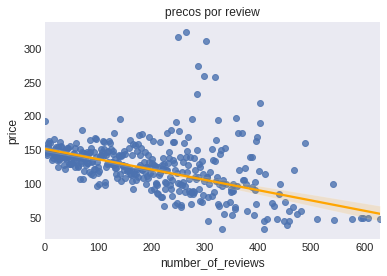

In [9]:
sns.regplot(df_50.groupby('number_of_reviews')['price'].mean().index,
            df_50.groupby('number_of_reviews')['price'].mean(),
            ci = 95, line_kws={'color': 'orange'}, robust = True)
plt.title('precos por review')
plt.show()

##### Analisando o impacto de bairro + numero de reviews:

In [10]:
bairro_num = df_50.groupby(['neighbourhood', 'number_of_reviews'])['price'].mean().sort_values(ascending = False)
bairro_num = pd.DataFrame(bairro_num).sort_values('neighbourhood')
bairro_num.sort_index(inplace = True)

##### Nota-se que dentro de um bairro, o número de reviews tambem nao se mostra correlato com o preço em si. Há a possibilidade de atuar em niveis ainda menores de granularidade, tendo impacto após a seleção de outras n variááveis.

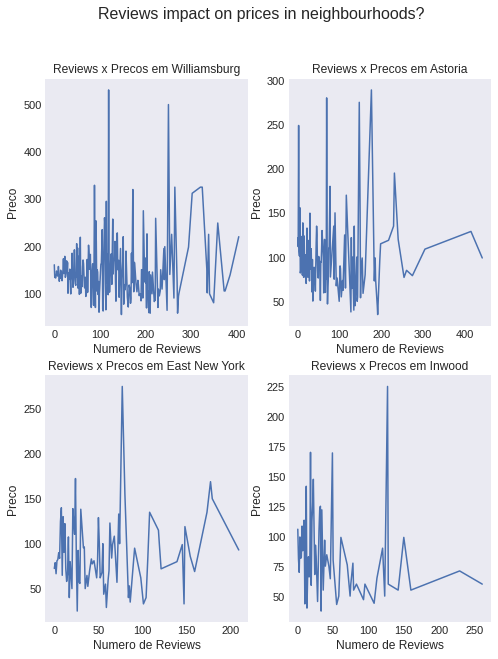

In [12]:
fig, ax = plt.subplots(2, 2, figsize = (8, 10))

ax[0,0].plot(bairro_num.loc['Williamsburg'])
ax[0,0].set_title('Reviews x Precos em Williamsburg')
ax[0,0].set_xlabel('Numero de Reviews')
ax[0,0].set_ylabel('Preco')

ax[0,1].plot(bairro_num.loc['Astoria'])
ax[0,1].set_title('Reviews x Precos em Astoria')
ax[0,1].set_xlabel('Numero de Reviews')
ax[0,1].set_ylabel('Preco')

ax[1,0].plot(bairro_num.loc['East New York'])
ax[1,0].set_title('Reviews x Precos em East New York')
ax[1,0].set_xlabel('Numero de Reviews')
ax[1,0].set_ylabel('Preco')

ax[1,1].plot(bairro_num.loc['Inwood'])
ax[1,1].set_title('Reviews x Precos em Inwood')
ax[1,1].set_xlabel('Numero de Reviews')
ax[1,1].set_ylabel('Preco')

fig.suptitle('Reviews impact on prices in neighbourhoods?', size = 16)
fig.show()

##### Geralmente locais inteiros possuem precos maiores, logo conseguimos inserir estes dados no modelo em forma numericalizada,

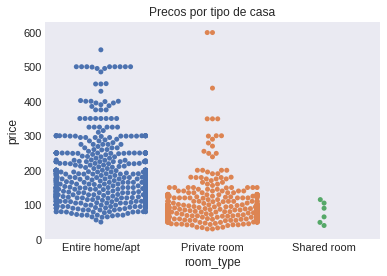

In [13]:
menor_600 = df_50.loc[df_50['price'] < 600]

ax = sns.swarmplot(x = menor_600[:1000]['room_type'], y = menor_600[:1000]['price'],)
ax.set_ylim(0, 630)
ax.set_title('Precos por tipo de casa')
plt.show()

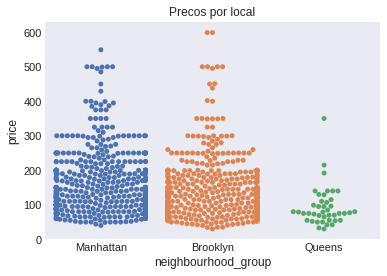

In [14]:
menor_600 = df_50.loc[df_50['price'] < 600]

ax = sns.swarmplot(x = menor_600[:1000]['neighbourhood_group'], y = menor_600[:1000]['price'],)
ax.set_ylim(0, 630)
ax.set_title('Precos por local')
plt.show()

##### Montando algoritmo de previsao de precos:

In [15]:
df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
# tornando as variaveis categoricas para o formato category, onde seu valor em
# memoria sera guardado como numero, o que torna a regressao possivel
cats = ['neighbourhood_group', 'neighbourhood', 'room_type']
for i in cats:
  df_50[i] = df_50[i].astype('category')
  df_50[f'{i}_cat'] = df_50[i].cat.codes;

In [17]:
df_50.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_cat', 'neighbourhood_cat', 'room_type_cat'],
      dtype='object')

In [32]:
Y = df_50[:-10]['price']
x = df_50[:-10][['latitude',
       'longitude', 'price', 'minimum_nights','neighbourhood_group_cat',
       'neighbourhood_cat','room_type_cat','number_of_reviews']]

In [33]:
modelo = sm.OLS(endog = Y, exog = x)
modelo_fitted = modelo.fit()

In [53]:
for i,z in zip(modelo_fitted.params.index, modelo_fitted.params.values):
  print(f'Variavel {i} -> Impacto no preco: {z} \n')

Variavel latitude -> Impacto no preco: 4.217433693942674e-13 

Variavel longitude -> Impacto no preco: 2.1057027649318272e-13 

Variavel price -> Impacto no preco: 0.9999999999999993 

Variavel minimum_nights -> Impacto no preco: 8.375694716511017e-17 

Variavel neighbourhood_group_cat -> Impacto no preco: 4.2493786267527867e-14 

Variavel neighbourhood_cat -> Impacto no preco: -6.164773552752578e-16 

Variavel room_type_cat -> Impacto no preco: 5.070596720280207e-15 

Variavel number_of_reviews -> Impacto no preco: -9.920449878242366e-18 



In [35]:
test = df_50[-10:][['latitude',
       'longitude', 'price', 'minimum_nights','neighbourhood_group_cat',
       'neighbourhood_cat','room_type_cat','number_of_reviews']]
test_price = df_50[:-10]['price']

In [36]:
a = [i for i in df.columns if i not in x]
a.append('price')
previsao = modelo_fitted.predict(test.head(3))

In [51]:
## Previsao dos precos dados os valores do dataframe:
for i,z in zip(previsao.values,test_price.head(3)):
  print(f'Valor Previsto: {i} /// Valor real: {z} \n')

Valor Previsto: 75.00000000000162 /// Valor real: 225 

Valor Previsto: 200.0000000000015 /// Valor real: 150 

Valor Previsto: 170.00000000000145 /// Valor real: 89 



### Questão 4. ​ Imagine que você é um analista de dados no ​ Airbnb ​ (empresa fornecedora dos dados) e lhe foi solicitada a criação de visualizações para entender melhor o que vem acontecendo com os aluguéis na cidade de Nova Iorque. Utilizando alguma ferramenta de visualização (PowerBI, Tableau, Excel, Metabase, Data Studio, etc) para realizar a ingestão do dataset, crie visualizações conforme as questões abaixo solicitadas. ​ Justifique cada escolha de visualização (tipo de gráfico e cores utilizadas), descreva qual ferramenta utilizou e ​ disponibilize o respectivo arquivo exportado da própria ferramenta​ , para correção.

####**a)** Quantidade de reviews agrupados pela coluna ​ neighbourhood​ . ​ (0,5 ponto). 
#### Justifique suas escolhas (0,5 ponto);

##### Por sua natureza categórica, utilizei na criação da visualização cores discrepantes para cada bairro analisado. Sendo por costume da paleta darkgrid da ferramenta seaborn, plotar em azul o primeiro valor. As colunas são renomeadas para seus nomes em português e o título é explicativo em português

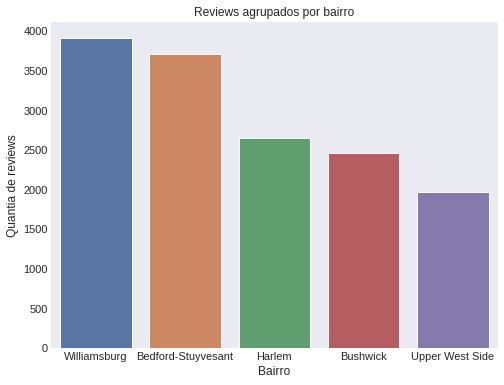

In [ ]:
review_nh = pd.DataFrame(df.groupby('neighbourhood')['number_of_reviews']
             .count().sort_values(ascending = False)[:5]).reset_index()

fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.barplot(x= 'neighbourhood', y='number_of_reviews', data=review_nh)
ax.set_ylabel('Quantia de reviews')
ax.set_xlabel('Bairro')
ax.set_title('Reviews agrupados por bairro')
fig.show()

##### **b)** Média da coluna ​ minimum_nights ​ agrupado pela coluna ​ room_type. (0,5 ponto).
#### Justifique suas escolhas (0,5 ponto);

##### Para esta plotagem, foi utilizada a própria linguagem python. Como a plotagem refere-se à dados categóricos, são utilizadas cores diferentes para cada conjunto para que haja discrepância visual entre às cores selecionadas na paleta para este problema. O formato de barra é de simples entendimento, uma vez que analisando apenas sua altura percebemos sua participação total nos dados. Colunas também renomeadas e título explicativo para tornar a visualização simples e informativa sobre seu propósito

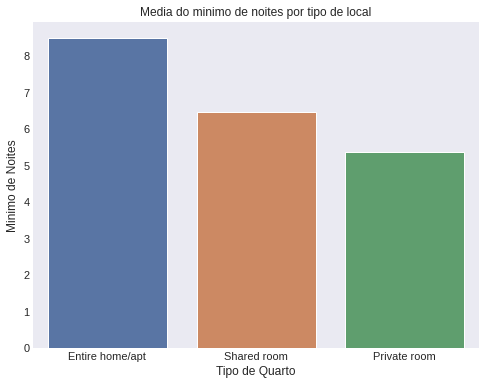

In [ ]:
min_nights = pd.DataFrame(df.groupby('room_type')['minimum_nights']
             .mean().sort_values(ascending = False)).reset_index()

fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.barplot(x= 'room_type', y='minimum_nights', data=min_nights)
ax.set_xlabel('Tipo de Quarto')
ax.set_ylabel('Minimo de Noites')
ax.set_title('Media do minimo de noites por tipo de local')
fig.show()

#### c) Utilizando as colunas ​ latitude ​ e ​ longitude,​ crie uma visualização geográfica (mapa) dos hosts presentes no dataset (0,5 ponto). Enriqueça o mapa com a utilização de cores e/ou tamanho de ponto diferenciado para outras características como preço, número mínimo de noites, número de reviews, tipo de quarto, por exemplo ​ (0,5 ponto). Justifique cada escolha (0,5 ponto);

##### Por estar utilizando a plataforma linux, nao tenho acesso ao PowerBI, onde sei plotar com visualização de mapa ao fundo. No entanto, segue visualização com pontos geográficos em python (no google colab nao há o pacote basemaps), onde os 20 locais mais caros estão na área em laranja e os 20 mais baratos em azul. Seus tamanhos são ponderados pelo preço da estadia. A ideia é simplificar o entendimento de quem vê, deixando em cores mais fortes os locais de maior preço, enquanto os mais baratos e mais frequentes em azul. O tamanho é multiplicado por fator menor na área mais cara, onde seu valor é diversas vezes maior.

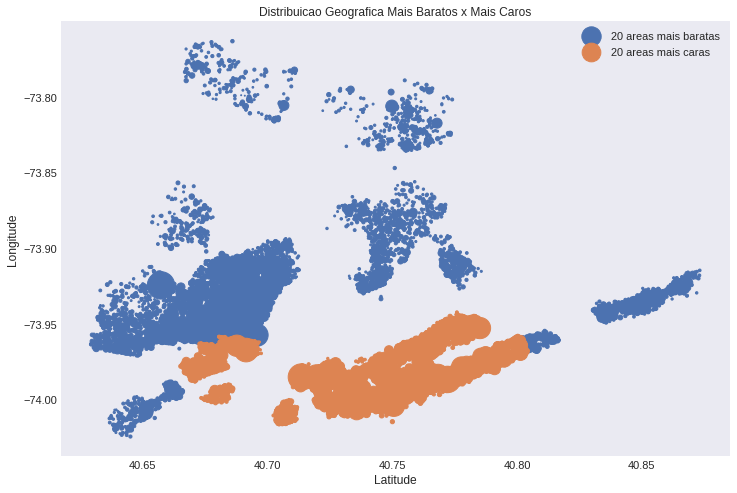

In [ ]:
mais_caros = df_50.loc[df_50['neighbourhood'].isin(bairros_mais_caros.index[:20].values)]
mais_baratos = df_50.loc[df_50['neighbourhood'].isin(bairros_mais_baratos.index[:20].values)]
# distribuicao Geografica dos mais caros x mais baratos
fig, ax = plt.subplots(figsize = (12, 8))

ax.scatter(x=mais_baratos['latitude'], y = mais_baratos['longitude'],label = '20 areas mais baratas',
           s=mais_baratos['price']*0.1)
ax.scatter(x=mais_caros['latitude'], y = mais_caros['longitude'], label = '20 areas mais caras', s=mais_caros['price']*0.07 )

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('Distribuicao Geografica Mais Baratos x Mais Caros')
ax.legend()
fig.show()

#### **d)** Suponhamos que foi solicitada uma visualização que mostre o número de reviews recebidos por mês em um determinado imóvel. Estes dados fictícios foram disponibilizados no ​ item 3. dos anexos​ . Crie uma visualização que mostre o número de reviews recebidos por mês (0,5 ponto). Justifique suas escolhas (0,5 ponto)

##### Como os dados vieram em formato temporal, a plotagem se torna melhor em linha, uma vez que há o entendimento de continuidade. Para checarmos o movimento temporal, foi utilizado o parametro de media movel para checarmos a media dos valores ao longo do tempo, o que se mostrou crescente até o último período checado.

In [ ]:
serie_temporal = pd.read_csv(path/'dados_teste_analistaDados.csv')
serie_temporal['data'] = pd.to_datetime(serie_temporal['data'],
                                        format = '%Y-%m-%d')
serie_temporal.set_index('data', inplace=True)

suavizacao =media_temporal_ponderada(serie_temporal['reviews'], 0.1, 0.8)
serie_temporal['media_movel']=serie_temporal['reviews'].expanding(min_periods=4).mean()

Index(['reviews'], dtype='object')

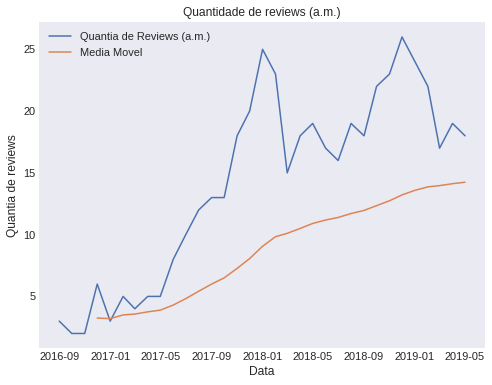

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(serie_temporal['reviews'], label = 'Quantia de Reviews (a.m.)')
ax.plot(serie_temporal['media_movel'], label = 'Media Movel')

ax.set_xlabel('Data')
ax.set_ylabel('Quantia de reviews')
ax.set_title('Quantidade de reviews (a.m.)')

ax.legend()
fig.show()